---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Merging Dataframes


In [1]:
import pandas as pd

df = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])
df

,Cost,Item Purchased,Name
Store 1,22.5,Sponge,Chris
Store 1,2.5,Kitty Litter,Kevyn
Store 2,5.0,Spoon,Filip


In [2]:
df['Date'] = ['December 1', 'January 1', 'mid-May']
df

,Cost,Item Purchased,Name,Date
Store 1,22.5,Sponge,Chris,December 1
Store 1,2.5,Kitty Litter,Kevyn,January 1
Store 2,5.0,Spoon,Filip,mid-May


In [3]:
df['Delivered'] = True
df

,Cost,Item Purchased,Name,Date,Delivered
Store 1,22.5,Sponge,Chris,December 1,True
Store 1,2.5,Kitty Litter,Kevyn,January 1,True
Store 2,5.0,Spoon,Filip,mid-May,True


In [7]:
df['Feedback'] = ['Positive', None, 'Negative']
df

df['a']=['a','b',None]
df

,Cost,Item Purchased,Name,Date,Delivered,Feedback,a
Store 1,22.5,Sponge,Chris,December 1,True,Positive,a
Store 1,2.5,Kitty Litter,Kevyn,January 1,True,None,b
Store 2,5.0,Spoon,Filip,mid-May,True,Negative,None


In [13]:
adf = df.reset_index()
adf['Date'] = pd.Series({0: 'December 1', 2: 'mid-May'})
adf['Date'] = pd.Series(['December 1', None, 'mid-May'])
adf

,index,Cost,Item Purchased,Name,Date,Delivered,Feedback,a
0,Store 1,22.5,Sponge,Chris,December 1,True,Positive,a
1,Store 1,2.5,Kitty Litter,Kevyn,None,True,None,b
2,Store 2,5.0,Spoon,Filip,mid-May,True,Negative,None


In [14]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])

student_df = student_df.set_index('Name')
print(staff_df.head())
print()
print(student_df.head())

                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader

            School
Name              
James     Business
Mike           Law
Sally  Engineering


In [15]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)


,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


In [16]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Sally,Course liasion,Engineering


In [17]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [18]:
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Course liasion,Engineering


In [19]:
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Name,Role,School
0,Kelly,Director of HR,NaN
1,Sally,Course liasion,Engineering
2,James,Grader,Business


In [20]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Location_x,Name,Role,Location_y,School
0,State Street,Kelly,Director of HR,NaN,NaN
1,Washington Avenue,Sally,Course liasion,512 Wilson Crescent,Engineering
2,Washington Avenue,James,Grader,1024 Billiard Avenue,Business


In [21]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])
staff_df
student_df
pd.merge(staff_df, student_df, how='inner', left_on=['First Name','Last Name'], right_on=['First Name','Last Name'])

,First Name,Last Name,Role,School
0,Sally,Brooks,Course liasion,Engineering


# Idiomatic Pandas: Making Code Pandorable

In [2]:
import pandas as pd
df = pd.read_csv('census.csv')
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


In [37]:
(df.where(df['SUMLEV']==50)
    .dropna()
    .set_index(['STNAME','CTYNAME'])
    .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})).head()

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                   
Alabama Autauga County    50.0     3.0       6.0    1.0     1.0   
        Baldwin County    50.0     3.0       6.0    1.0     3.0   
        Barbour County    50.0     3.0       6.0    1.0     5.0   
        Bibb County       50.0     3.0       6.0    1.0     7.0   
        Blount County     50.0     3.0       6.0    1.0     9.0   

                        CENSUS2010POP  Estimates Base 2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                               
Alabama Autauga County        54571.0              54571.0          54660.0   
        Baldwin County       182265.0             182265.0         183193.0   
        Barbour County        27457.0              27457.0          27341.0   
        Bibb County           22915.0              22919.0          22861.0   
        Blount County         57322.0              57322.0          57373.0   

                        POPESTIMATE2011  POPESTIMATE2012     ...       \
STNAME  CTYNAME                                              ...        
Alabama Autauga County          55253.0          55175.0     ...        
        Baldwin County         186659.0         190396.0     ...        
        Barbour County          27226.0          27159.0     ...        
        Bibb County             22733.0          22642.0     ...        
        Blount County           57711.0          57776.0     ...        

                        RDOMESTICMIG2011  RDOMESTICMIG2012  RDOMESTICMIG2013  \
STNAME  CTYNAME                                                                
Alabama Autauga County          7.242091         -2.915927         -3.012349   
        Baldwin County         14.832960         17.647293         21.845705   
        Barbour County         -4.728132         -2.500690         -7.056824   
        Bibb County            -5.527043         -5.068871         -6.201001   
        Blount County           1.807375         -1.177622         -1.748766   

                        RDOMESTICMIG2014  RDOMESTICMIG2015  RNETMIG2011  \
STNAME  CTYNAME                                                           
Alabama Autauga County          2.265971         -2.530799     7.606016   
        Baldwin County         19.243287         17.197872    15.844176   
        Barbour County         -3.904217        -10.543299    -4.874741   
        Bibb County            -0.177537          0.177258    -5.088389   
        Blount County          -2.062535         -1.369970     1.859511   

                        RNETMIG2012  RNETMIG2013  RNETMIG2014  RNETMIG2015  
STNAME  CTYNAME                                                             
Alabama Autauga County    -2.626146    -2.722002     2.592270    -2.187333  
        Baldwin County    18.559627    22.727626    20.317142    18.293499  
        Barbour County    -2.758113    -7.167664    -3.978583   -10.543299  
        Bibb County       -4.363636    -5.403729     0.754533     1.107861  
        Blount County     -0.848580    -1.402476    -1.577232    -0.884411  

[5 rows x 98 columns]

In [38]:
df = df[df['SUMLEV']==50]
df.set_index(['STNAME','CTYNAME'], inplace=True)
df.rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'}).head()

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                   
Alabama Autauga County      50       3         6      1       1   
        Baldwin County      50       3         6      1       3   
        Barbour County      50       3         6      1       5   
        Bibb County         50       3         6      1       7   
        Blount County       50       3         6      1       9   

                        CENSUS2010POP  Estimates Base 2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                               
Alabama Autauga County          54571                54571            54660   
        Baldwin County         182265               182265           183193   
        Barbour County          27457                27457            27341   
        Bibb County             22915                22919            22861   
        Blount County           57322                57322            57373   

                        POPESTIMATE2011  POPESTIMATE2012     ...       \
STNAME  CTYNAME                                              ...        
Alabama Autauga County            55253            55175     ...        
        Baldwin County           186659           190396     ...        
        Barbour County            27226            27159     ...        
        Bibb County               22733            22642     ...        
        Blount County             57711            57776     ...        

                        RDOMESTICMIG2011  RDOMESTICMIG2012  RDOMESTICMIG2013  \
STNAME  CTYNAME                                                                
Alabama Autauga County          7.242091         -2.915927         -3.012349   
        Baldwin County         14.832960         17.647293         21.845705   
        Barbour County         -4.728132         -2.500690         -7.056824   
        Bibb County            -5.527043         -5.068871         -6.201001   
        Blount County           1.807375         -1.177622         -1.748766   

                        RDOMESTICMIG2014  RDOMESTICMIG2015  RNETMIG2011  \
STNAME  CTYNAME                                                           
Alabama Autauga County          2.265971         -2.530799     7.606016   
        Baldwin County         19.243287         17.197872    15.844176   
        Barbour County         -3.904217        -10.543299    -4.874741   
        Bibb County            -0.177537          0.177258    -5.088389   
        Blount County          -2.062535         -1.369970     1.859511   

                        RNETMIG2012  RNETMIG2013  RNETMIG2014  RNETMIG2015  
STNAME  CTYNAME                                                             
Alabama Autauga County    -2.626146    -2.722002     2.592270    -2.187333  
        Baldwin County    18.559627    22.727626    20.317142    18.293499  
        Barbour County    -2.758113    -7.167664    -3.978583   -10.543299  
        Bibb County       -4.363636    -5.403729     0.754533     1.107861  
        Blount County     -0.848580    -1.402476    -1.577232    -0.884411  

[5 rows x 98 columns]

In [3]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]

    return pd.Series({'min': np.min(data), 'max': np.max(data)})

In [34]:
df.apply(min_max, axis=1).head()
# df_minmax=df[['POPESTIMATE2010','POPESTIMATE2011',
#     'POPESTIMATE2012','POPESTIMATE2013',
#     'POPESTIMATE2014','POPESTIMATE2015','CTYNAME']]
# Res=pd.DataFrame()
# Res['Min']= np.min(df_minmax,axis=1)
# Res['Max']= np.max(df_minmax,axis=1)
# Res

,max,min
0,4858979,4785161
1,55347,54660
2,203709,183193
3,27341,26489
4,22861,22512


In [35]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    row['max'] = np.max(data)
    row['min'] = np.min(data)
    return row
df.apply(min_max, axis=1)

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,max,min
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594,4858979,4785161
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333,55347,54660
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499,203709,183193
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299,27341,26489
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861,22861,22512
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411,57776,57373
6,50,3,6,1,11,Alabama,Bullock County,10914,10915,10887,...,-1.130263,14.354290,-16.167247,-29.001673,-2.825524,1.507017,17.243790,-13.193961,10887,10606
7,50,3,6,1,13,Alabama,Butler County,20947,20946,20944,...,-5.655413,1.085428,-6.529805,-13.936612,-11.586865,-5.557058,1.184103,-6.430868,20944,20154
8,50,3,6,1,15,Alabama,Calhoun County,118572,118586,118437,...,-5.524649,-4.463211,-3.376322,-5.791579,-4.092677,-5.062836,-3.912834,-2.806406,118437,115620
9,50,3,6,1,17,Alabama,Chambers County,34215,34170,34098,...,2.872721,-2.287222,1.349468,-1.821092,4.701181,3.781439,-1.290228,2.346901,34153,33993


In [36]:
rows = ['POPESTIMATE2010',
        'POPESTIMATE2011',
        'POPESTIMATE2012',
        'POPESTIMATE2013',
        'POPESTIMATE2014',
        'POPESTIMATE2015']
df.apply(lambda x: np.max(x[rows]), axis=1)


0       4858979
1         55347
2        203709
3         27341
4         22861
5         57776
6         10887
7         20944
8        118437
9         34153
10        26084
11        43943
12        13841
13        25767
14        13880
15        15072
16        51211
17        54514
18        13208
19        11758
20        38060
21        13963
22        82005
23        50358
24        43803
25        71387
26        81468
27        38309
28       104442
29        17231
         ...   
3163     133674
3164     396488
3165      52422
3166      24581
3167     169639
3168      74807
3169     586107
3170      37956
3171      12022
3172      49220
3173      15856
3174      14343
3175       7444
3176      41129
3177      13666
3178       4846
3179       8636
3180      97121
3181      18722
3182      82178
3183       2548
3184      29237
3185       8812
3186      30020
3187      10418
3188      45162
3189      23125
3190      21102
3191       8545
3192       7234
dtype: int64

# Group by

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
6,50,3,6,1,11,Alabama,Bullock County,10914,10915,10887,...,-30.953709,-5.180127,-1.130263,14.354290,-16.167247,-29.001673,-2.825524,1.507017,17.243790,-13.193961
7,50,3,6,1,13,Alabama,Butler County,20947,20946,20944,...,-14.032727,-11.684234,-5.655413,1.085428,-6.529805,-13.936612,-11.586865,-5.557058,1.184103,-6.430868
8,50,3,6,1,15,Alabama,Calhoun County,118572,118586,118437,...,-6.155670,-4.611706,-5.524649,-4.463211,-3.376322,-5.791579,-4.092677,-5.062836,-3.912834,-2.806406
9,50,3,6,1,17,Alabama,Chambers County,34215,34170,34098,...,-2.731639,3.849092,2.872721,-2.287222,1.349468,-1.821092,4.701181,3.781439,-1.290228,2.346901
10,50,3,6,1,19,Alabama,Cherokee County,25989,25986,25976,...,6.339327,1.113180,5.488706,-0.076806,-3.239866,6.416167,1.420264,5.757384,0.230419,-2.931307


In [ ]:
%%timeit -n 10

for state in df['STNAME'].unique():
    avg = np.average(df.where(df['STNAME']==state).dropna()['CENSUS2010POP'])
    print('Counties in state ' + state + ' have an average population of ' + str(avg))

Counties in state Alabama have an average population of 71339.3432836
Counties in state Alaska have an average population of 24490.7241379
Counties in state Arizona have an average population of 426134.466667
Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.567164
Counties in state Georgia have an average population of 60928.6352201
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in stat

Counties in state Kansas have an average population of 27172.552381
Counties in state Kentucky have an average population of 36161.3916667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.666667
Counties in state Massachusetts have an average population of 467687.785714
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.6551724
Counties in state Mississippi have an average population of 36186.5487805
Counties in state Missouri have an average population of 52077.626087
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.0752688
Counties in state Nevada have an average population of 158855.941176
Counties in state New Hampshire have an average population of 131647.0
Counties in state New

Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.3962264
Counties in state Ohio have an average population of 131096.636364
Counties in state Oklahoma have an average population of 48718.8441558
Counties in state Oregon have an average population of 106418.722222
Counties in state Pennsylvania have an average population of 189587.746269
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.391304
Counties in state South Dakota have an average population of 12336.0606061
Counties in state Tennessee have an average population of 66801.1052632
Counties in state Texas have an average population of 98998.2716535
Counties in state Utah have an average population of 95306.3793103
Counties in state Vermont have an average population of 44695.7857143
Counties in state Virginia have an average population of 60111.2932331
C

Counties in state Washington have an average population of 172424.102564
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.9166667
Counties in state Wyoming have an average population of 24505.4782609
Counties in state Alabama have an average population of 71339.3432836
Counties in state Alaska have an average population of 24490.7241379
Counties in state Arizona have an average population of 426134.466667
Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.567164
Coun

Counties in state Georgia have an average population of 60928.6352201
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in state Indiana have an average population of 70476.1086957
Counties in state Iowa have an average population of 30771.2626263
Counties in state Kansas have an average population of 27172.552381
Counties in state Kentucky have an average population of 36161.3916667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.666667
Counties in state Massachusetts have an average population of 467687.785714
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.6551724
Counties in state Mississippi ha

Counties in state Nebraska have an average population of 19638.0752688
Counties in state Nevada have an average population of 158855.941176
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.619048
Counties in state New Mexico have an average population of 62399.3636364
Counties in state New York have an average population of 312550.032258
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.3962264
Counties in state Ohio have an average population of 131096.636364
Counties in state Oklahoma have an average population of 48718.8441558
Counties in state Oregon have an average population of 106418.722222
Counties in state Pennsylvania have an average population of 189587.746269
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.391

Counties in state Vermont have an average population of 44695.7857143
Counties in state Virginia have an average population of 60111.2932331
Counties in state Washington have an average population of 172424.102564
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.9166667
Counties in state Wyoming have an average population of 24505.4782609
Counties in state Alabama have an average population of 71339.3432836
Counties in state Alaska have an average population of 24490.7241379
Counties in state Arizona have an average population of 426134.466667
Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.333333
Counties in

Counties in state Florida have an average population of 280616.567164
Counties in state Georgia have an average population of 60928.6352201
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in state Indiana have an average population of 70476.1086957
Counties in state Iowa have an average population of 30771.2626263
Counties in state Kansas have an average population of 27172.552381
Counties in state Kentucky have an average population of 36161.3916667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.666667
Counties in state Massachusetts have an average population of 467687.785714
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have a

Counties in state Missouri have an average population of 52077.626087
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.0752688
Counties in state Nevada have an average population of 158855.941176
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.619048
Counties in state New Mexico have an average population of 62399.3636364
Counties in state New York have an average population of 312550.032258
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.3962264
Counties in state Ohio have an average population of 131096.636364
Counties in state Oklahoma have an average population of 48718.8441558
Counties in state Oregon have an average population of 106418.722222
Counties in state Pennsylvania have an average population of 189587.746269
Countie

Counties in state Texas have an average population of 98998.2716535
Counties in state Utah have an average population of 95306.3793103
Counties in state Vermont have an average population of 44695.7857143
Counties in state Virginia have an average population of 60111.2932331
Counties in state Washington have an average population of 172424.102564
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.9166667
Counties in state Wyoming have an average population of 24505.4782609
Counties in state Alabama have an average population of 71339.3432836
Counties in state Alaska have an average population of 24490.7241379
Counties in state Arizona have an average population of 426134.466667
Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state 

Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in state Indiana have an average population of 70476.1086957
Counties in state Iowa have an average population of 30771.2626263
Counties in state Kansas have an average population of 27172.552381
Counties in state Kentucky have an average population of 36161.3916667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.666667
Counties in state Massachusetts have an average population of 467687.785714
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.6551724
Counties in state Mississippi have an average population of 36186.5487805
Counties in state Missouri h

Counties in state New Jersey have an average population of 418661.619048
Counties in state New Mexico have an average population of 62399.3636364
Counties in state New York have an average population of 312550.032258
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.3962264
Counties in state Ohio have an average population of 131096.636364
Counties in state Oklahoma have an average population of 48718.8441558
Counties in state Oregon have an average population of 106418.722222
Counties in state Pennsylvania have an average population of 189587.746269
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.391304
Counties in state South Dakota have an average population of 12336.0606061
Counties in state Tennessee have an average population of 66801.1052632
Counties in state Texas have an average population of 98998.

Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.9166667
Counties in state Wyoming have an average population of 24505.4782609
Counties in state Alabama have an average population of 71339.3432836
Counties in state Alaska have an average population of 24490.7241379
Counties in state Arizona have an average population of 426134.466667
Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.567164
Counties in state Georgia have an average population of 60928.6352201
Countie

Counties in state Iowa have an average population of 30771.2626263
Counties in state Kansas have an average population of 27172.552381
Counties in state Kentucky have an average population of 36161.3916667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.666667
Counties in state Massachusetts have an average population of 467687.785714
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.6551724
Counties in state Mississippi have an average population of 36186.5487805
Counties in state Missouri have an average population of 52077.626087
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.0752688
Counties in state Nevada have an average population of 158855.941176
Counties in state New Ham

Counties in state North Dakota have an average population of 12690.3962264
Counties in state Ohio have an average population of 131096.636364
Counties in state Oklahoma have an average population of 48718.8441558
Counties in state Oregon have an average population of 106418.722222
Counties in state Pennsylvania have an average population of 189587.746269
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.391304
Counties in state South Dakota have an average population of 12336.0606061
Counties in state Tennessee have an average population of 66801.1052632
Counties in state Texas have an average population of 98998.2716535
Counties in state Utah have an average population of 95306.3793103
Counties in state Vermont have an average population of 44695.7857143
Counties in state Virginia have an average population of 60111.2932331
Counties in state Washington have an average population of 172424.102564


In [ ]:
#%%timeit -n 10


for group, frame in df.groupby('STNAME'):
    avg = np.average(frame['CENSUS2010POP'])
    print('Counties in state ' + group + ' have an average population of ' + str(avg))
    


In [78]:
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
STNAME,,,,,,,,,,,,,,,,,,,,,
Alabama,50,3,6,1,1,Autauga County,54571,54571,54660,55253,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
Alabama,50,3,6,1,3,Baldwin County,182265,182265,183193,186659,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
Alabama,50,3,6,1,5,Barbour County,27457,27457,27341,27226,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
Alabama,50,3,6,1,7,Bibb County,22915,22919,22861,22733,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
Alabama,50,3,6,1,9,Blount County,57322,57322,57373,57711,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


In [82]:
#df = df.set_index('STNAME')

def fun(item):
    if item[0]<'M':
        return 0
    if item[0]<'Q':
        return 1
    return 2

for group, frame in df.groupby(fun):
    print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')


There are 1177 records in group 0 for processing.
There are 1134 records in group 1 for processing.
There are 831 records in group 2 for processing.


In [87]:
#df=df.reset_index()
df.groupby('STNAME').sum('CENSUS2010POP')

TypeError: f() takes 1 positional argument but 2 were given

In [ ]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]

In [ ]:
df.groupby('STNAME').agg({'CENSUS2010POP': np.average})

In [ ]:
print(type(df.groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']))
print(type(df.groupby(level=0)['POPESTIMATE2010']))

In [ ]:
(df.set_index('STNAME').groupby(level=0)['CENSUS2010POP']
    .agg({'avg': np.average, 'sum': np.sum}))

In [ ]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'avg': np.average, 'sum': np.sum}))

(df.groupby(level=0)['POPESTIMATE2010']
.agg({'avg':np.average}))

(df.groupby(level=0)['POPESTIMATE2010']
.mean())

df.groupby(level=0)['POPESTIMATE2010'].apply(np.average)

In [ ]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'POPESTIMATE2010': np.average, 'POPESTIMATE2011': np.sum}))

# Scales

In [2]:
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])
df.rename(columns={0: 'Grades'}, inplace=True)
df

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [6]:
df['Grades'].astype('category')

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
good         B-
ok           C+
ok            C
ok           C-
poor         D+
poor          D
Name: Grades, dtype: category
Categories (11, object): [A, A+, A-, B, ..., C+, C-, D, D+]

In [14]:
grades = df['Grades'].astype('category',
                             categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'],
                             ordered=True)
grades.head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [D < D+ < C- < C ... B+ < A- < A < A+]

In [15]:
grades > 'C'

excellent     True
excellent     True
excellent     True
good          True
good          True
good          True
ok            True
ok           False
ok           False
poor         False
poor         False
Name: Grades, dtype: bool

In [20]:
s= pd.Series(['Low','Low','High','Medium',"Low","High",'Low'])
s=s.astype('category',categories=['Low','Medium','High'],ordered=True)
s>'Medium'

0    False
1    False
2     True
3    False
4    False
5     True
6    False
dtype: bool

In [28]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df = df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg({'avg': np.average})
pd.cut(df['avg'],10)

s=pd.Series([168,180,174,190,170,185,179,181,175,169,182,177,180,171])
pd.cut(s,3#,labels=['small','Medium','Large']
      )


0     (167.978, 175.333]
1     (175.333, 182.667]
2     (167.978, 175.333]
3         (182.667, 190]
4     (167.978, 175.333]
5         (182.667, 190]
6     (175.333, 182.667]
7     (175.333, 182.667]
8     (167.978, 175.333]
9     (167.978, 175.333]
10    (175.333, 182.667]
11    (175.333, 182.667]
12    (175.333, 182.667]
13    (167.978, 175.333]
dtype: category
Categories (3, object): [(167.978, 175.333] < (175.333, 182.667] < (182.667, 190]]

# Pivot Tables

In [29]:
#http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64
df = pd.read_csv('cars.csv')

In [30]:
df.head()

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,n/a,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,n/a,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,n/a,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,n/a,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,n/a,117,7


In [31]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=np.mean)

Make,BMW,CHEVROLET,FORD,KIA,MITSUBISHI,NISSAN,SMART,TESLA
YEAR,,,,,,,,
2012,NaN,NaN,NaN,NaN,49.0,80.0,NaN,NaN
2013,NaN,NaN,107.0,NaN,49.0,80.0,35.0,280.000000
2014,NaN,104.0,107.0,NaN,49.0,80.0,35.0,268.333333
2015,125.0,104.0,107.0,81.0,49.0,80.0,35.0,320.666667
2016,125.0,104.0,107.0,81.0,49.0,80.0,35.0,409.700000


In [58]:
x=df.groupby(['YEAR','Make'])['(kW)'].mean()
   

x.to_frame().rename(columns={0:"YEAR", 1:"Make",2:"v"})
print(x)
#x.pivot(index='YEAR',columns='Make',values='v')

YEAR  Make      
2012  MITSUBISHI     49.000000
      NISSAN         80.000000
2013  FORD          107.000000
      MITSUBISHI     49.000000
      NISSAN         80.000000
      SMART          35.000000
      TESLA         280.000000
2014  CHEVROLET     104.000000
      FORD          107.000000
      MITSUBISHI     49.000000
      NISSAN         80.000000
      SMART          35.000000
      TESLA         268.333333
2015  BMW           125.000000
      CHEVROLET     104.000000
      FORD          107.000000
      KIA            81.000000
      MITSUBISHI     49.000000
      NISSAN         80.000000
      SMART          35.000000
      TESLA         320.666667
2016  BMW           125.000000
      CHEVROLET     104.000000
      FORD          107.000000
      KIA            81.000000
      MITSUBISHI     49.000000
      NISSAN         80.000000
      SMART          35.000000
      TESLA         409.700000
Name: (kW), dtype: float64


In [61]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=[np.mean,np.min], margins=True)

mean                                                             \
Make    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART       TESLA   
YEAR                                                                     
2012    NaN       NaN    NaN   NaN       49.0   80.0   NaN         NaN   
2013    NaN       NaN  107.0   NaN       49.0   80.0  35.0  280.000000   
2014    NaN     104.0  107.0   NaN       49.0   80.0  35.0  268.333333   
2015  125.0     104.0  107.0  81.0       49.0   80.0  35.0  320.666667   
2016  125.0     104.0  107.0  81.0       49.0   80.0  35.0  409.700000   
All   125.0     104.0  107.0  81.0       49.0   80.0  35.0  345.478261   

                   amin                                                        \
Make         All    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART  TESLA   
YEAR                                                                            
2012   64.500000    NaN       NaN    NaN   NaN       49.0   80.0   NaN    NaN   
2013  158.444444    NaN       NaN  107.0   NaN       49.0   80.0  35.0  270.0   
2014  135.000000    NaN     104.0  107.0   NaN       49.0   80.0  35.0  225.0   
2015  181.428571  125.0     104.0  107.0  81.0       49.0   80.0  35.0  280.0   
2016  252.263158  125.0     104.0  107.0  81.0       49.0   80.0  35.0  283.0   
All   190.622642  125.0     104.0  107.0  81.0       49.0   80.0  35.0  225.0   

            
Make   All  
YEAR        
2012  49.0  
2013  35.0  
2014  35.0  
2015  35.0  
2016  35.0  
All   35.0

# Date Functionality in Pandas

In [62]:
import pandas as pd
import numpy as np

### Timestamp

In [63]:
pd.Timestamp('9/1/2016 10:05AM')

Timestamp('2016-09-01 10:05:00')

### Period

In [64]:
pd.Period('1/2016')

Period('2016-01', 'M')

In [65]:
pd.Period('3/5/2016')

Period('2016-03-05', 'D')

### DatetimeIndex

In [68]:
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03')])
t1


['a', 'b', 'c']

In [7]:
type(t1.index)

pandas.tseries.index.DatetimeIndex

### PeriodIndex

In [8]:
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'), pd.Period('2016-11')])
t2

2016-09    d
2016-10    e
2016-11    f
Freq: M, dtype: object

In [9]:
type(t2.index)

pandas.tseries.period.PeriodIndex

### Converting to Datetime

In [10]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

,a,b
2 June 2013,16,46
"Aug 29, 2014",14,66
2015-06-26,59,99
7/12/16,27,17


In [11]:
ts3.index = pd.to_datetime(ts3.index)
ts3


,a,b
2013-06-02,16,46
2014-08-29,14,66
2015-06-26,59,99
2016-07-12,27,17


In [69]:
pd.to_datetime('4.7.12', dayfirst=True)


Timestamp('2012-07-04 00:00:00')

### Timedeltas

In [70]:
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [71]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timedelta('12 days 03:00:00')

### Working with Dates in a Dataframe

In [76]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates


DatetimeIndex(['2016-10-01', '2016-10-03', '2016-10-05', '2016-10-07',
               '2016-10-09'],
              dtype='datetime64[ns]', freq='2D')


In [78]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,108,117
2016-10-16,112,116
2016-10-30,107,128
2016-11-13,105,127
2016-11-27,106,127
2016-12-11,104,125
2016-12-25,112,124
2017-01-08,116,117
2017-01-22,125,118


In [79]:
df.index.weekday_name

array(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday', 'Sunday'], dtype=object)

In [80]:
#Lead in SQL Server but with Dates
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,4.0,-1.0
2016-10-30,-5.0,12.0
2016-11-13,-2.0,-1.0
2016-11-27,1.0,0.0
2016-12-11,-2.0,-2.0
2016-12-25,8.0,-1.0
2017-01-08,4.0,-7.0
2017-01-22,9.0,1.0


In [81]:
df.resample('M').mean()

,Count 1,Count 2
2016-10-31,109.0,120.333333
2016-11-30,105.5,127.000000
2016-12-31,108.0,124.500000
2017-01-31,120.5,117.500000


In [82]:
df['2017']

,Count 1,Count 2
2017-01-08,116,117
2017-01-22,125,118


In [21]:
df['2016-12']

,Count 1,Count 2
2016-12-11,109,121
2016-12-25,105,126


In [22]:
df['2016-12':]

,Count 1,Count 2
2016-12-11,109,121
2016-12-25,105,126
2017-01-08,105,125
2017-01-22,101,123


In [85]:
df.asfreq('W', method='ffill')


,Count 1,Count 2
2016-10-02,108,117
2016-10-09,108,117
2016-10-16,112,116
2016-10-23,112,116
2016-10-30,107,128
2016-11-06,107,128
2016-11-13,105,127
2016-11-20,105,127
2016-11-27,106,127
2016-12-04,106,127


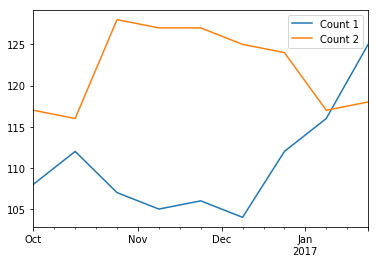

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()